# TRẦN ĐỖ TRUNG KIÊN – 52000679
# HUỲNH HỒNG SƠN - 52000795
# NGUYỄN THÀNH HUY - 52100895

In [98]:
import pandas as pd

In [99]:
#file diabetes_012_health_indicators_BRFSS2021

filename = '../data/diabetes_012_health_indicators_BRFSS2021.csv'
df = pd.read_csv(filename)
df.head(5)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0,1.0,1,15.0,1.0,0.0,0.0,0,1,...,1,0.0,5.0,10.0,20.0,0.0,0,11,4.0,5.0
1,2.0,1,0.0,1,28.0,0.0,0.0,1.0,0,1,...,1,0.0,2.0,0.0,0.0,0.0,0,11,4.0,3.0
2,2.0,1,1.0,1,33.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,10.0,0.0,0.0,0,9,4.0,7.0
3,2.0,0,1.0,1,29.0,0.0,1.0,1.0,1,1,...,1,0.0,5.0,0.0,30.0,1.0,1,12,3.0,4.0
4,0.0,0,0.0,1,24.0,1.0,0.0,0.0,0,0,...,1,0.0,3.0,0.0,0.0,1.0,1,13,5.0,6.0


In [100]:
print(df.shape)

(236378, 22)


In [101]:
types = df.dtypes
print(types)

Diabetes_012            float64
HighBP                    int64
HighChol                float64
CholCheck                 int64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity              int64
Fruits                    int64
Veggies                   int64
HvyAlcoholConsump         int64
AnyHealthcare             int64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                       int64
Age                       int64
Education               float64
Income                  float64
dtype: object


In [102]:
data = pd.DataFrame(df)
# Đếm số lần xuất hiện của mỗi giá trị trong từng cột
value_counts = df.apply(pd.Series.value_counts)

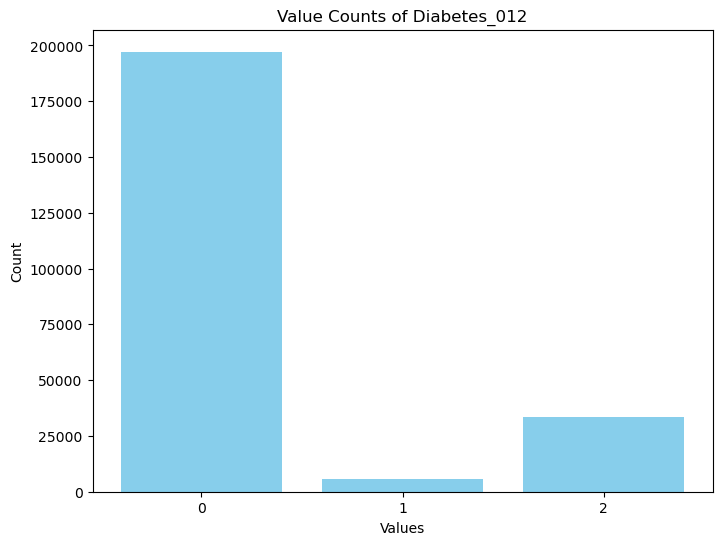

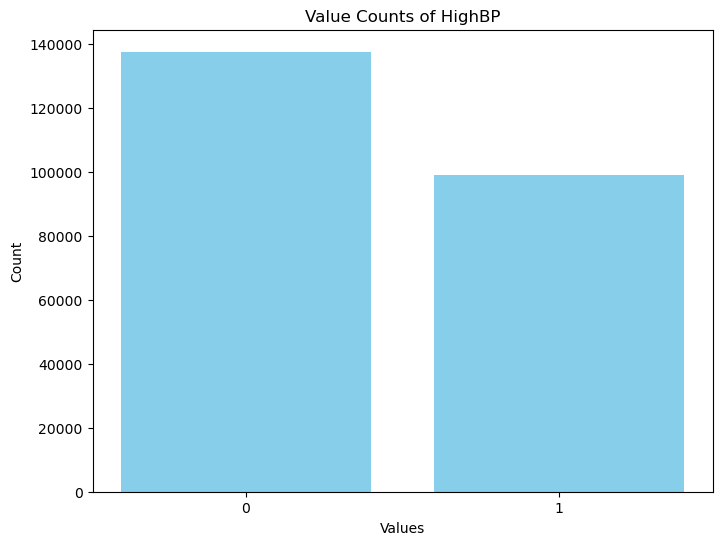

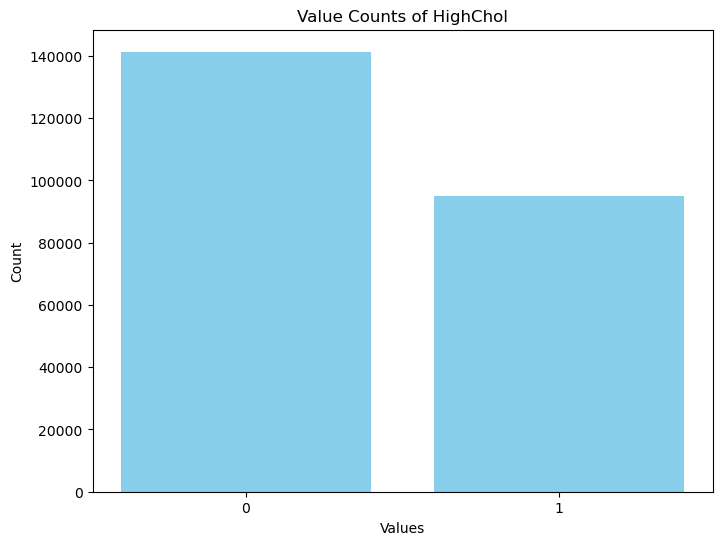

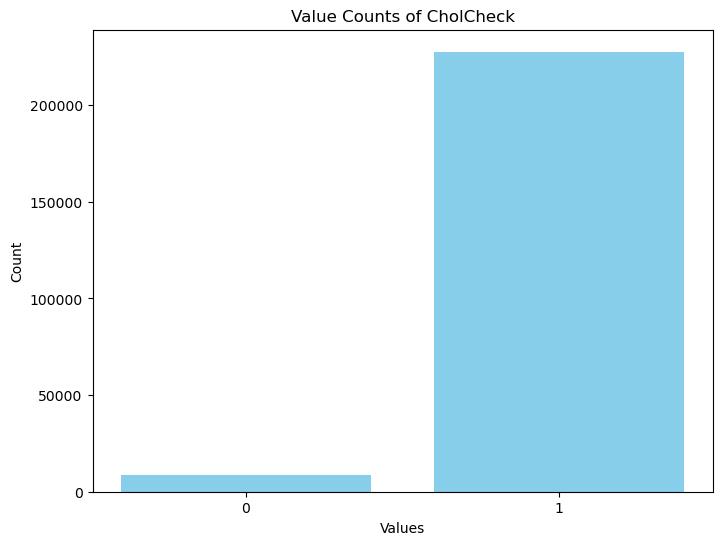

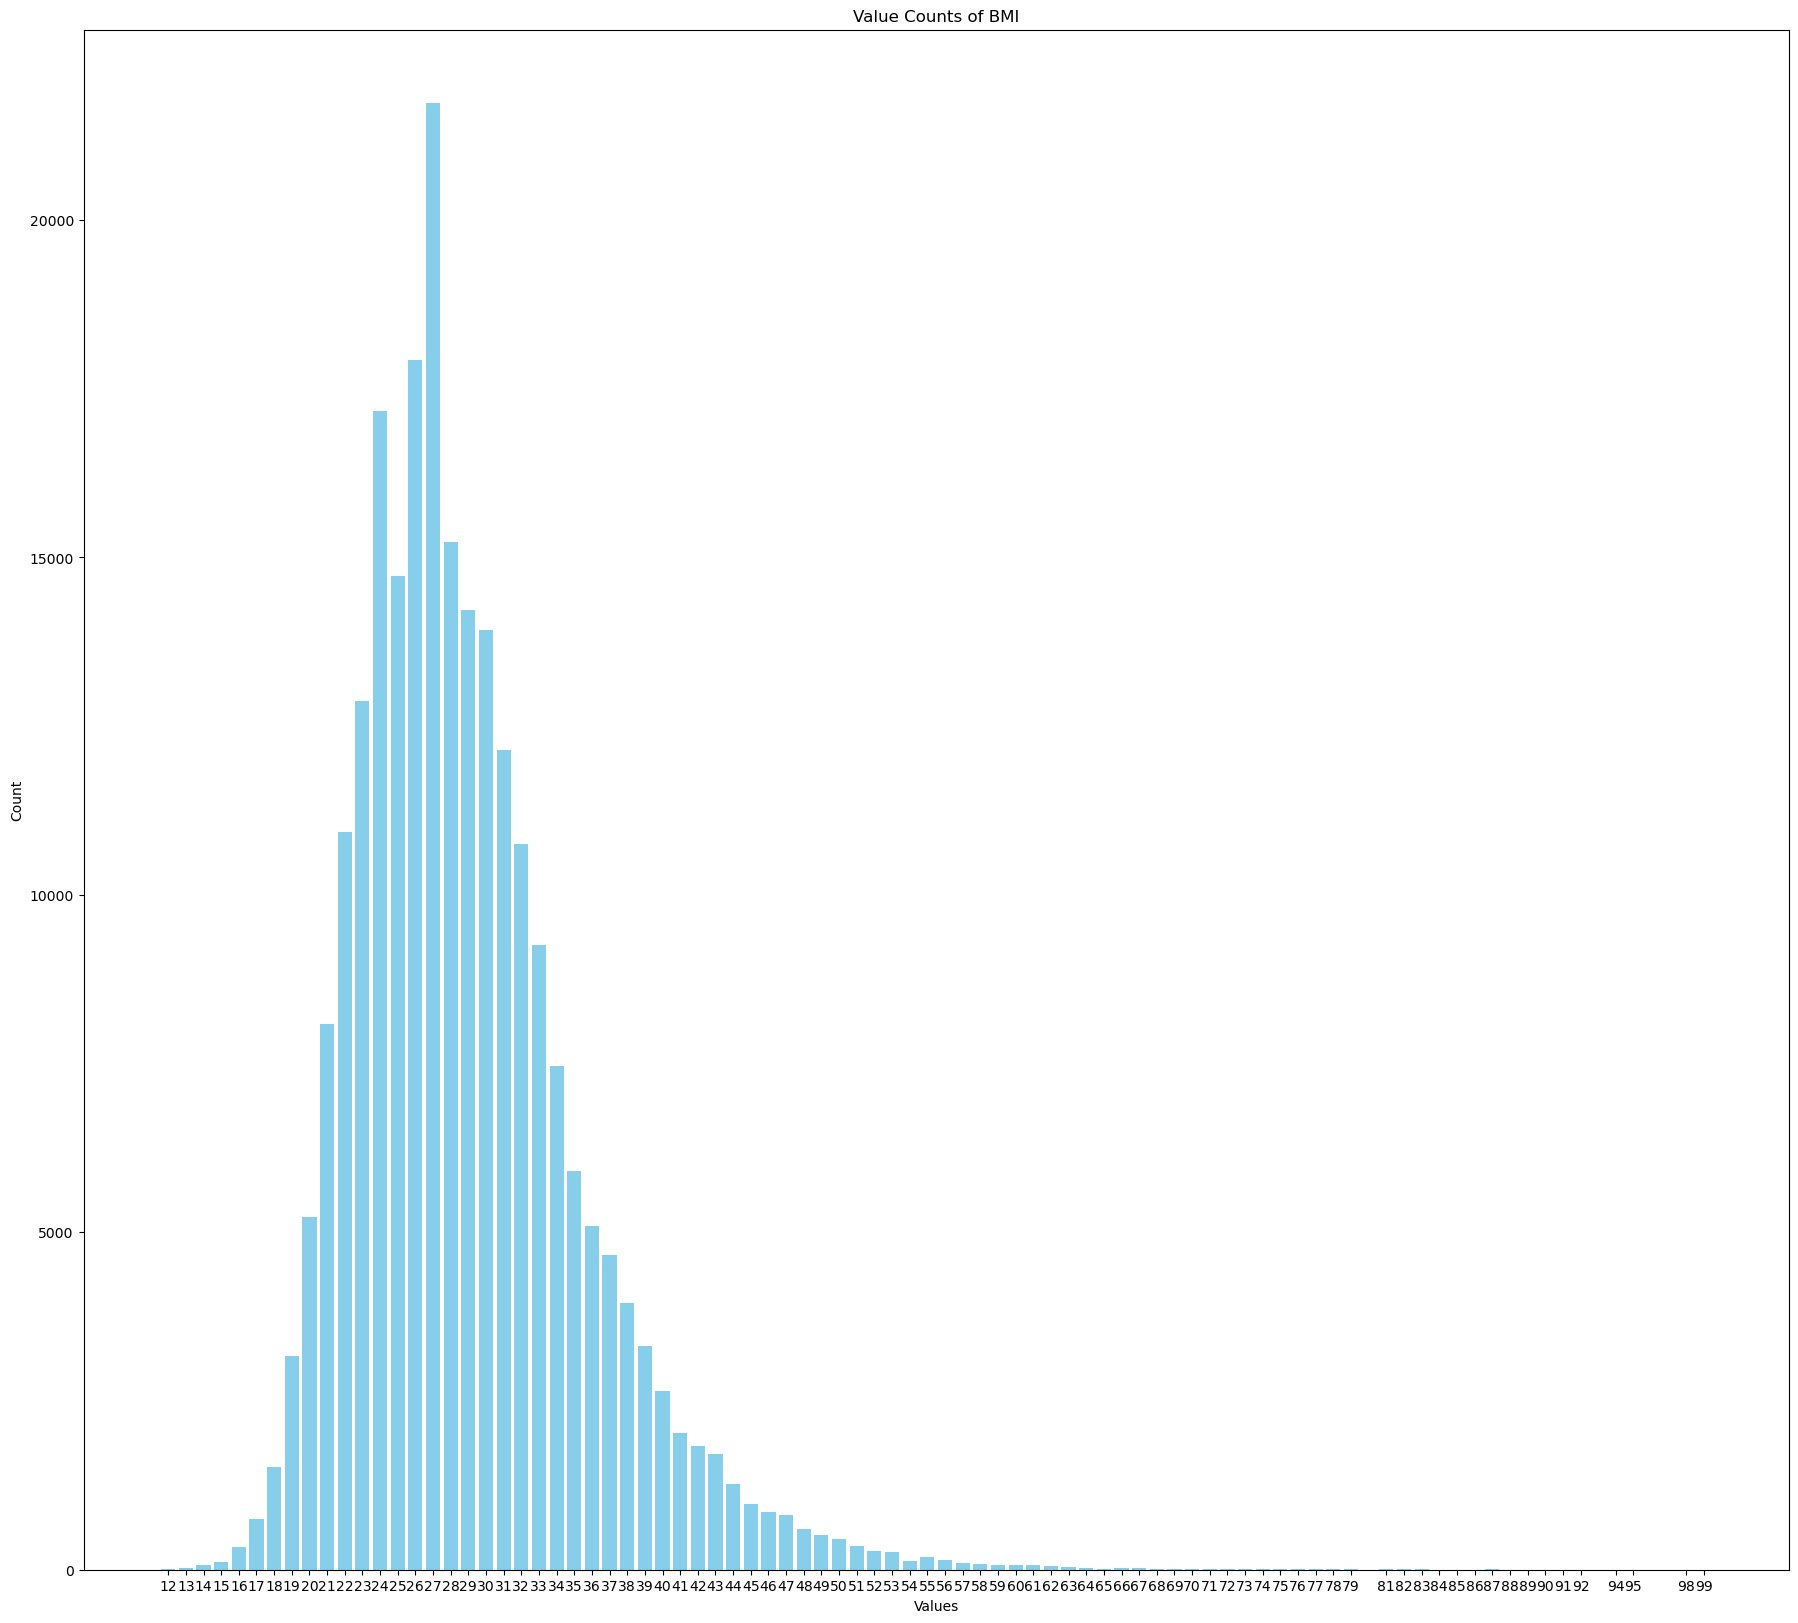

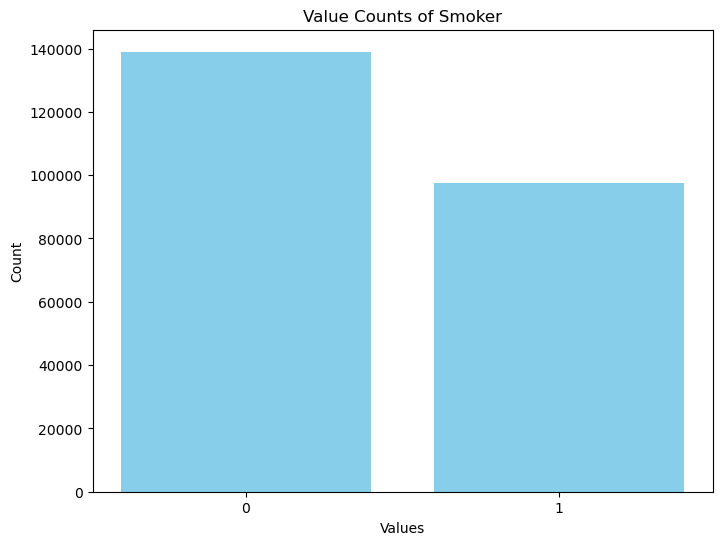

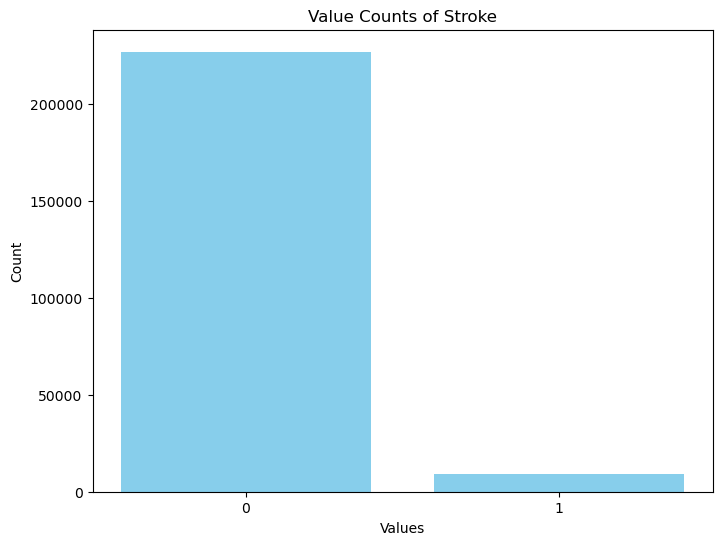

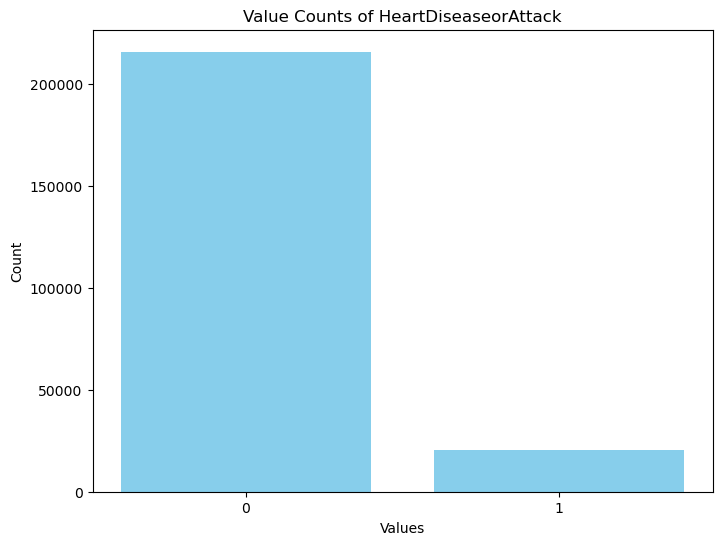

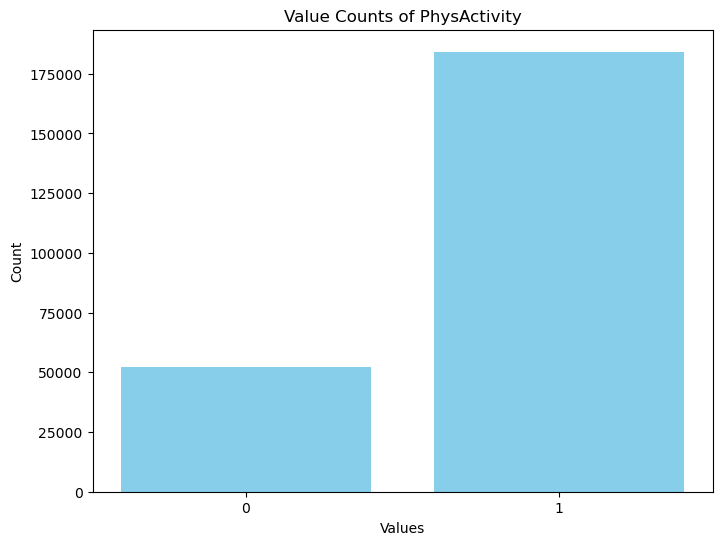

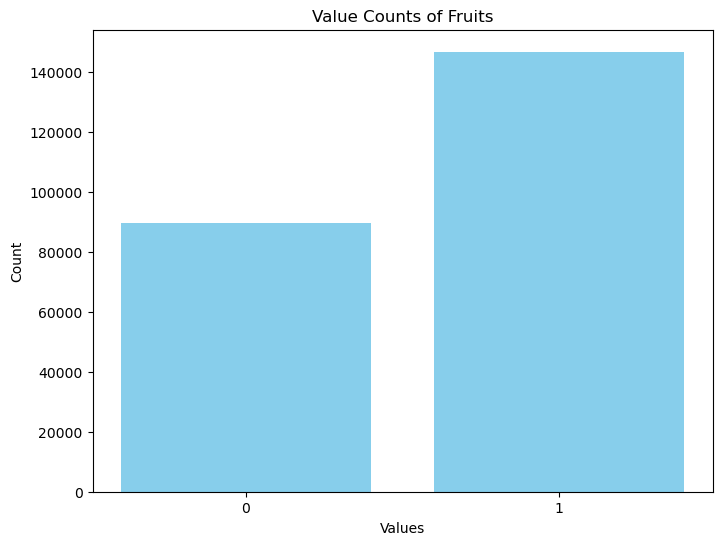

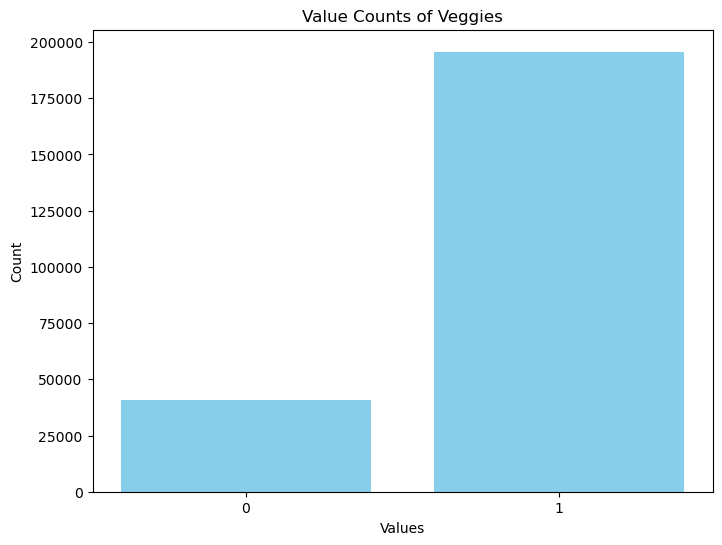

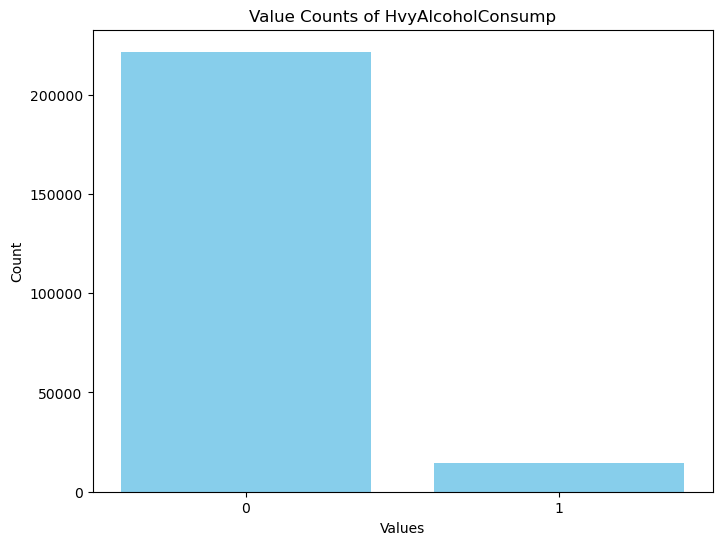

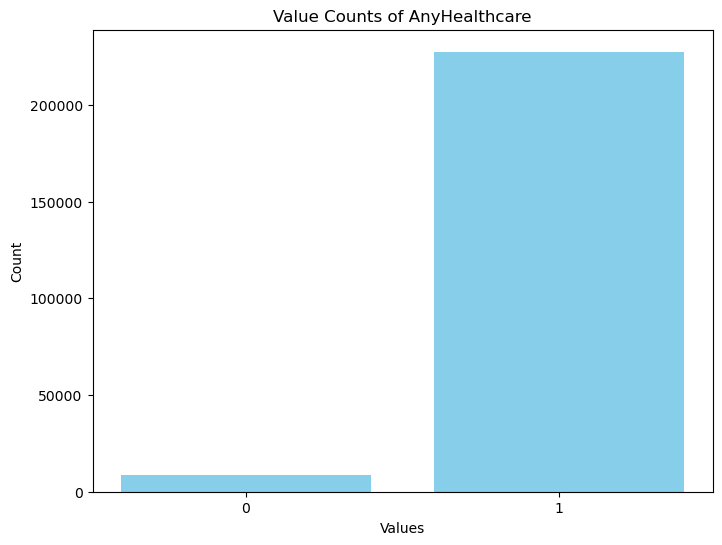

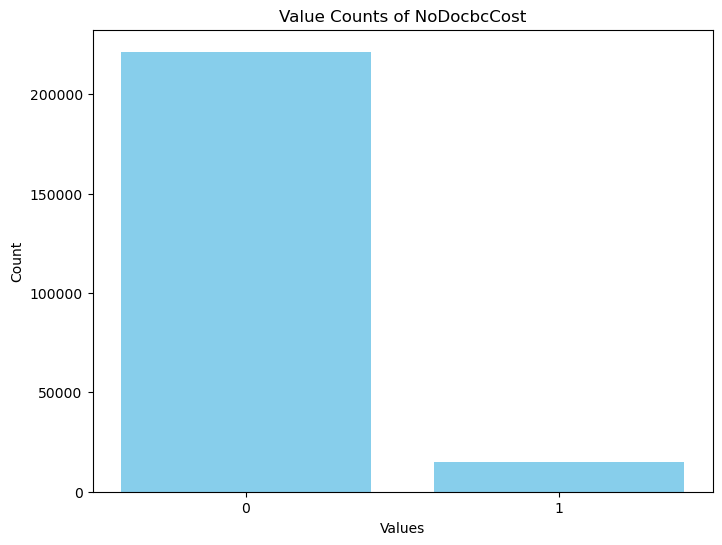

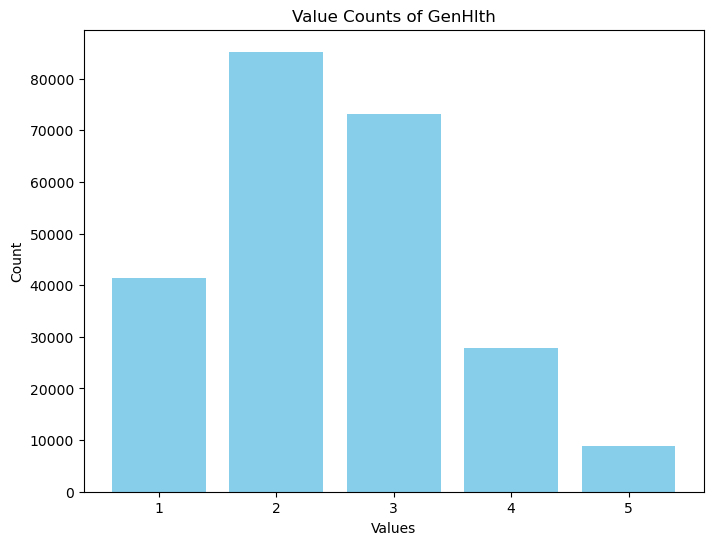

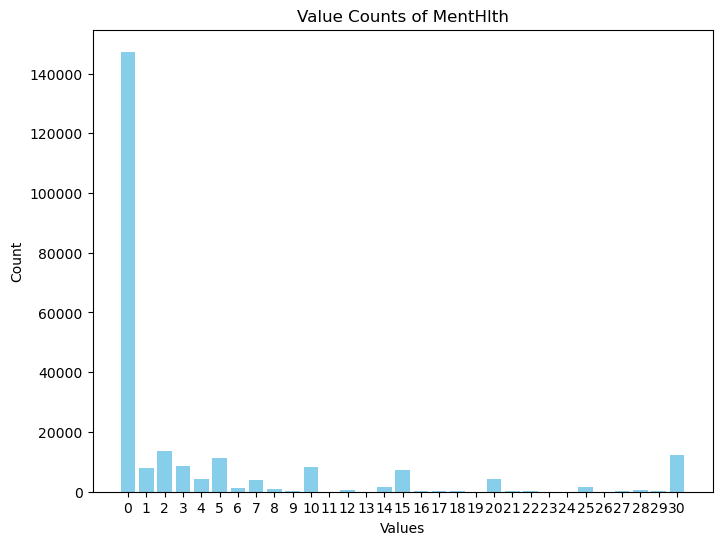

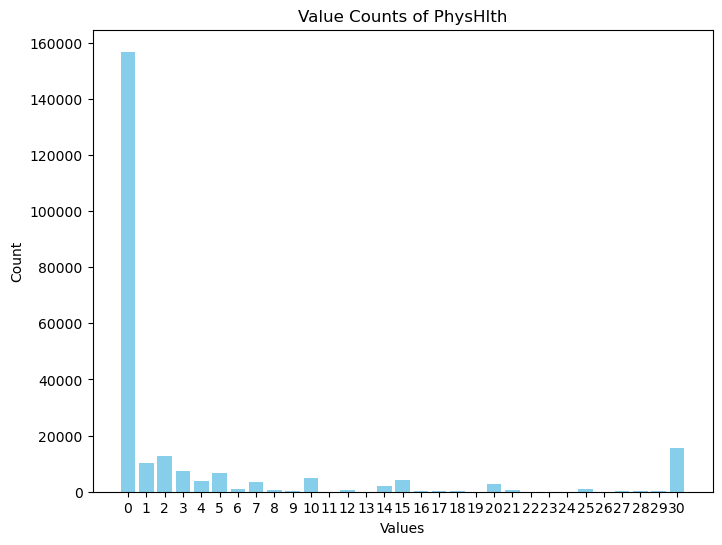

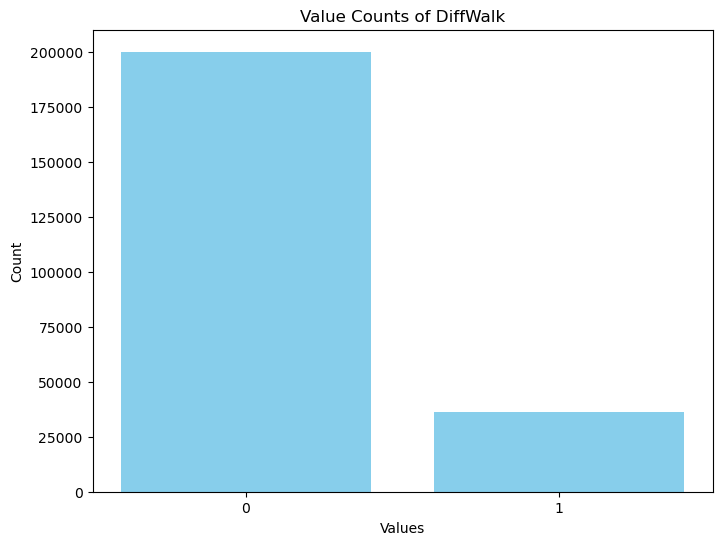

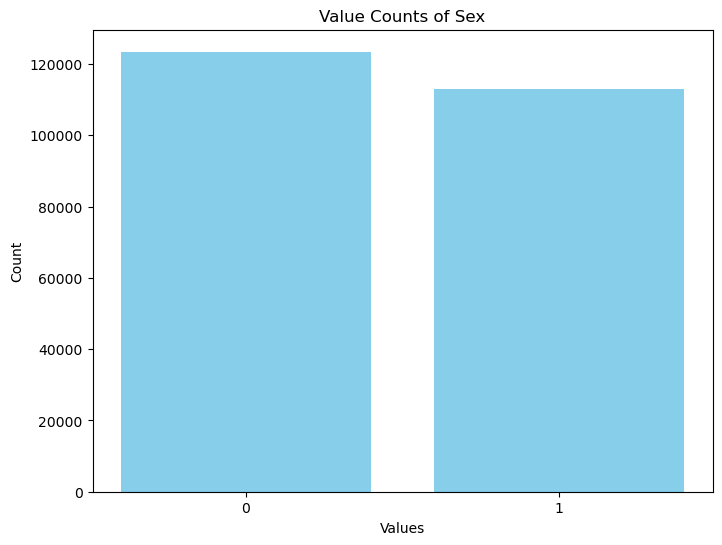

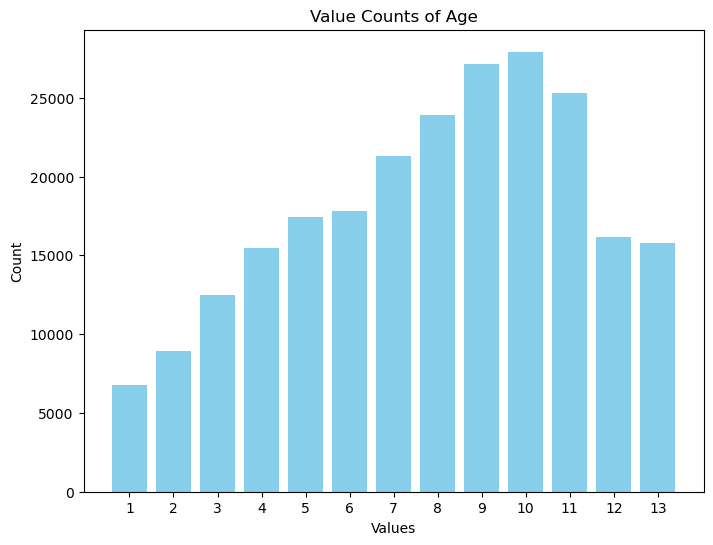

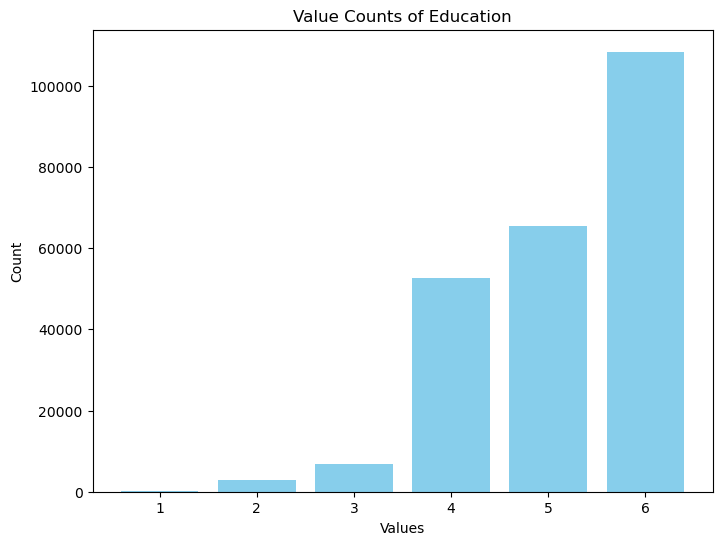

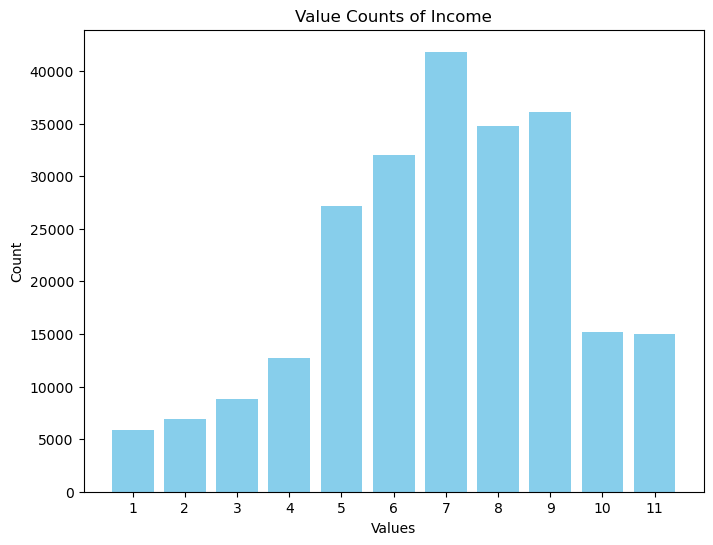

In [103]:
import matplotlib.pyplot as plt
# Vẽ đồ thị cho từng cột
for column in df.columns:
    unique_values = df[column].unique()
    value_counts = df[column].value_counts()
    if(column == 'BMI'):
        plt.figure(figsize=(22, 20))
    else:
    	plt.figure(figsize=(8, 6))
    plt.bar(value_counts.index, value_counts.values, color='skyblue')
    plt.title(f'Value Counts of {column}')
    plt.xlabel('Values')
    plt.ylabel('Count')
    plt.xticks(unique_values)  # Đảm bảo chỉ hiển thị các giá trị duy nhất trong cột
    plt.show()

In [104]:
#ma trận tương quan
correlation_matrix = df.corr()

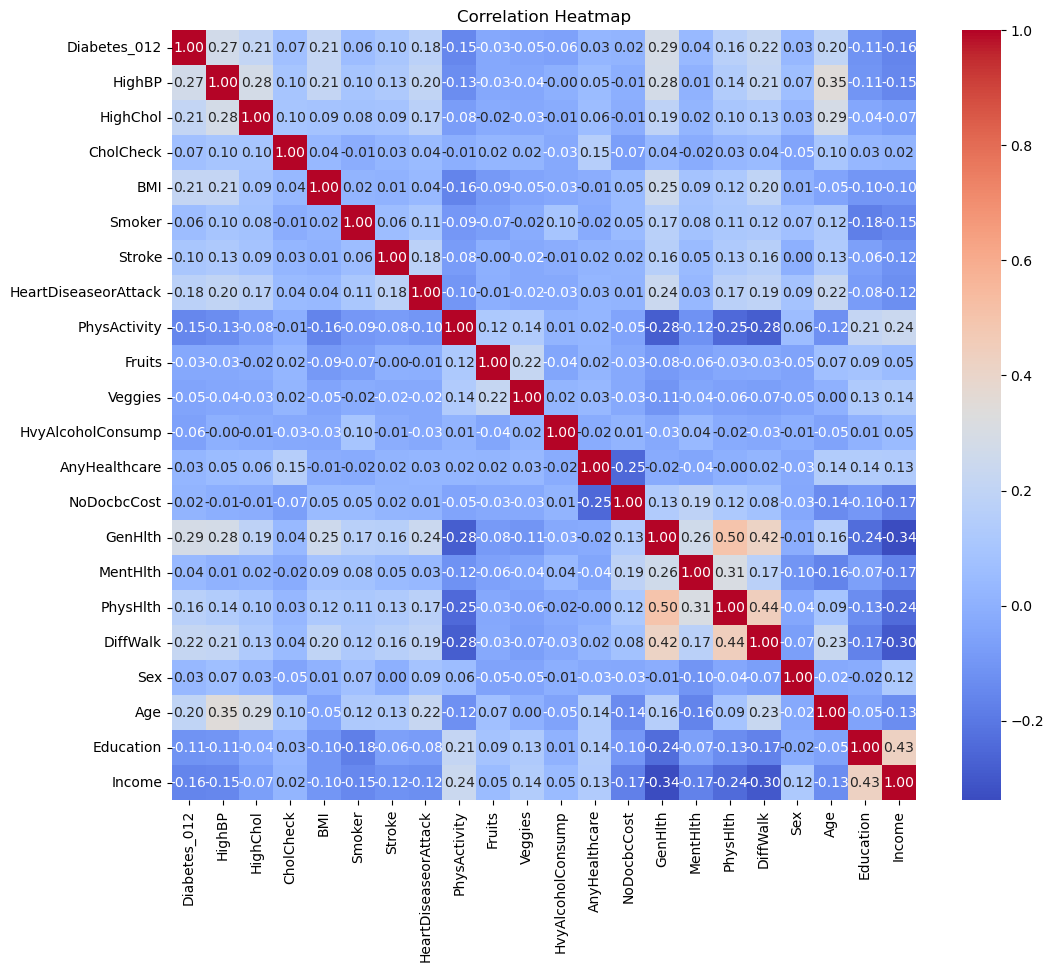

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt
# Vẽ biểu đồ nhiệt độ
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [106]:
# Xác định cột nhãn và các cột đặc trưng
X = df.drop('Diabetes_012', axis=1)
y = df['Diabetes_012']
print(X.head(5))

   HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0       0       1.0          1  15.0     1.0     0.0                   0.0   
1       1       0.0          1  28.0     0.0     0.0                   1.0   
2       1       1.0          1  33.0     0.0     0.0                   0.0   
3       0       1.0          1  29.0     0.0     1.0                   1.0   
4       0       0.0          1  24.0     1.0     0.0                   0.0   

   PhysActivity  Fruits  Veggies  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0             0       1        1  ...              1          0.0      5.0   
1             0       1        0  ...              1          0.0      2.0   
2             1       1        1  ...              1          0.0      2.0   
3             1       1        1  ...              1          0.0      5.0   
4             0       0        0  ...              1          0.0      3.0   

   MentHlth  PhysHlth  DiffWalk  Sex  Age  Education  Income  

In [107]:
from sklearn.model_selection import train_test_split
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [108]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

# Khởi tạo và huấn luyện các mô hình
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)

bagging = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=10, random_state=42)
bagging.fit(X_train, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(), random_state=42)

In [109]:
# Dự đoán
knn_pred = knn.predict(X_test)
linear_reg_pred = linear_reg.predict(X_test)
decision_tree_pred = decision_tree.predict(X_test)
bagging_pred = bagging.predict(X_test)

In [110]:
from sklearn.metrics import mean_squared_error

# Tính Mean Squared Error
knn_mse = mean_squared_error(y_test, knn_pred)
linear_reg_mse = mean_squared_error(y_test, linear_reg_pred)
decision_tree_mse = mean_squared_error(y_test, decision_tree_pred)
bagging_mse = mean_squared_error(y_test, bagging_pred)

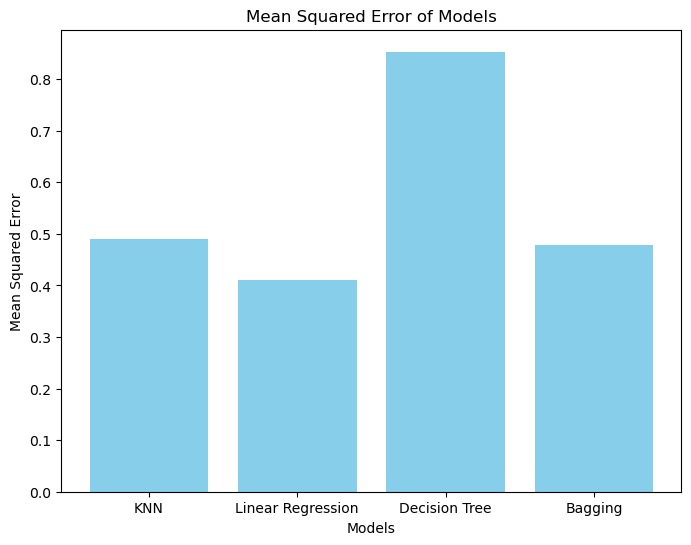

In [111]:
# Vẽ biểu đồ so sánh MSE của 4 mô hình
models = ['KNN', 'Linear Regression', 'Decision Tree', 'Bagging']
mse_scores = [knn_mse, linear_reg_mse, decision_tree_mse, bagging_mse]

plt.figure(figsize=(8, 6))
plt.bar(models, mse_scores, color='skyblue')
plt.title('Mean Squared Error of Models')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.show()

In [112]:
from sklearn.metrics import r2_score

# Tính toán R-squared cho từng mô hình
knn_r2 = r2_score(y_test, knn_pred)
linear_reg_r2 = r2_score(y_test, linear_reg_pred)
decision_tree_r2 = r2_score(y_test, decision_tree_pred)
bagging_r2 = r2_score(y_test, bagging_pred)

print(f"R-squared for KNN: {knn_r2}")
print(f"R-squared for Linear Regression: {linear_reg_r2}")
print(f"R-squared for Decision Tree: {decision_tree_r2}")
print(f"R-squared for Bagging: {bagging_r2}")


R-squared for KNN: 0.012440805800830734
R-squared for Linear Regression: 0.17138045343031205
R-squared for Decision Tree: -0.7226873271758101
R-squared for Bagging: 0.03585118974768897


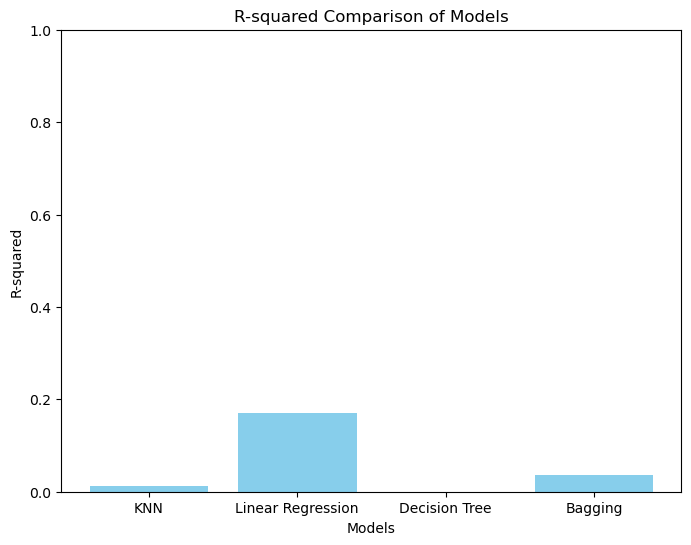

In [113]:
# List chứa các giá trị R-squared của từng mô hình
r_squared_values = [knn_r2, linear_reg_r2, decision_tree_r2, bagging_r2]
models = ['KNN', 'Linear Regression', 'Decision Tree', 'Bagging']

# Vẽ biểu đồ
plt.figure(figsize=(8, 6))
plt.bar(models, r_squared_values, color='skyblue')
plt.title('R-squared Comparison of Models')
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.ylim(0, 1)  # Đặt giới hạn trục y từ 0 đến 1 vì R-squared nằm trong khoảng từ 0 đến 1
plt.show()